In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


위의 과정은 pandas, numpy 라이브러리를 추가하고, csv파일을 읽어와 df에 저장하는
과정이다.

In [2]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Position,Level,Salary
0,1,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


concat: 서로 이어 붙이는 함수이다.
https://yganalyst.github.io/data_handling/Pd_12/

Series: pandas의 list와 같은 자료형이다. index도 지정할 수 있다는게 특징
axis=1 -> '열'방향으로써 붙이겠다는 의미
index = df.index -> 인덱스를 df의 인덱스와 같게 하겠다는 의미
https://nittaku.tistory.com/110

?? : 근데 왜 concat(pd, df)는 되는데 반대 순서인 concat(df, pd)는 안될까?



In [3]:
df = df.drop(columns = 'Position')

df의 'Position' 열을 제거

In [4]:
y=df['Salary']
X = df.drop(columns = 'Salary')
X.head()


,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


y는 df의 'Salary' 열을 가짐
X에서 'Salary' 열을 제거함

In [5]:
X['Level1'] = X['Level']**2
X['Level2'] = X['Level']**3
X.head()

,00,Level,Level1,Level2
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


지수 생성 부분

In [6]:
m = len(X)
X = X/X.max()

X.max()가 1000이었음 그래서 값들이 천으로 나뉘게 됨

In [7]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

가설함수를 정의한 것 X와 theta를 이용하여 y를 예측한다.

In [8]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

비용함수를 정의한 것이다.

In [9]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k<epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)*X.iloc[:,c])/m
        j = cost(X, y, theta)
        J.append(j)
        k+=1
    return J, theta
            

iloc[:,c] 는 c번째 열을 의미한다.


In [10]:
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

theta를 0으로 초기화 (랜덤한 값으로 초기화할 수도 있음)
alpha = 0.05, theta 값을 700회 반복

In [11]:
y_hat = hypothesis(X, theta)

최종 theta 값(final theta valus)과 비용을 잘 얻었으니
최종 theta에 따른 salary 예측을 구하는 것이다.

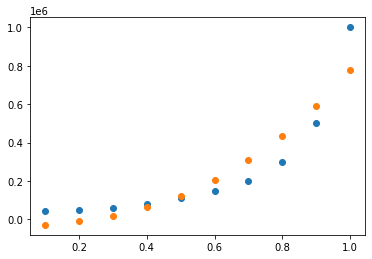

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X['Level'], y=y)
plt.scatter(x=X['Level'], y=y_hat)
plt.show()

위의 결과값이 기존 salary와 우리가 예측하는 salary 값을 level에 따라 출력한 것이다. 예측값이 실제 결과의 추세와 완전히 같지는 않지만 상당히 유사함을 알 수 있다.

Linear regression은 오직 직선만을 반환한다. 하지만 polynomial regression은 다음과 같이 곡선 모양으로 반환할 수 있다.

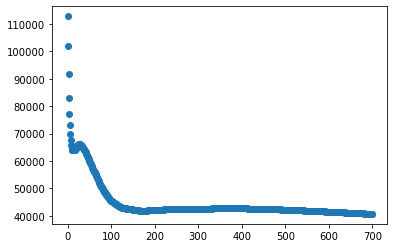

In [14]:
plt.figure()
plt.scatter(x=list(range(0,700)), y=J)
plt.show()

다음은 각각 반복에 따른 gradient descent function의 값의 변화를 나타낸 것이다.
값이 초기에는 급격하게 떨어지다가 후반부에는 완만하게 떨어진다.
좋은 알고리즘을 배우는 기계는 비용이 수렴까지 꾸준히 떨어져야만 한다.